# PHYS 309 Assignment 1

### Getting started

<ul>
    <li>If you do not already have the <a href="https://www.anaconda.com/products/distribution">Anaconda <tt>python</tt> distribution</a>, click the link to install the individual, free version</li>
    <li>Download this notebook to your own computer, open with <tt>Jupyter</tt> notebook or lab, and complete the missing code. See the <a href="https://docs.jupyter.org/en/latest/start/index.html"><tt>Jupyter</tt> documentation</a> for help.</li>
</ul>

<strong>Instead of putting in the values of physical constants such as $c$ and $\epsilon_0$ by hand, use SI values pre-programmed into [scipy.constants](https://docs.scipy.org/doc/scipy/reference/constants.html).
For example, $\mu_0$ is <tt>constants.mu_0</tt>.

### Set up <tt>python</tt> environment

In [3]:
import scipy.integrate as spi
import numpy as np

# Define the function to integrate
def integrand(t):
    return 2 * np.exp(-t) * t**4 * (2 * np.cos((2 * np.pi * t) / 3) + np.cos(2 * np.pi * t))

# Target integral values range (10% accuracy around 1.14)
target_range = (1.02, 1.26)

# Function to compute the integral for a given range (-x, x)
def compute_integral(x):
    result, _ = spi.quad(integrand, -x, x)
    return result

# Search for the smallest x that gives an integral within the target range
x_values = np.linspace(1, 10, 100)  # Checking x from 1 to 10
valid_x = None

for x in x_values:
    integral_value = compute_integral(x)
    if target_range[0] <= integral_value <= target_range[1]:
        valid_x = x
        break

valid_x, integral_value


(None, 168111824.66958147)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif",
                     "font.sans-serif":"Arial"})

### Questions


Recall that the speed of light in vacuum is
\begin{equation}
c = \frac{1}{\sqrt{\epsilon_0 \mu_0}}, \; \; \; \; \; (1)
\end{equation}
where $\epsilon_0 = 8.85 \times 10^{-12}$ F/m (Farads per meter)$^{*}$ is the electric permittivity of free space and $\mu_0 = 1.26 \times 10^{-6}$ N/A$^2$ (Newtons per Ampere$^2$)$^{**}$ is the magnetic permeability of free space. The electric field created by a point charge $q$ is
\begin{equation}
E = \frac{1}{4 \pi \epsilon_0} \frac{q}{r^2}. \; \; \; \; (2)
\end{equation}

Suppose a charged particle is moving at some fraction $f$ of the speed of light in vacuum ($v_q = f c; \; 0 < f < 1$) as seen in reference frame $K$. Reference frame $K^{\prime}$ is co-moving with the point charge, so that $\frac{dx^{\prime}}{dt^{\prime}} = v^{\prime}_q = 0$ in frame $K^{\prime}$. To make the math easier, put $q$ at the origin of $K^{\prime}$.

To understand Einstein's motivation for developing the special theory of relativity, make the <strong>incorrect, erroneous, and wrong</strong> assumption that the Galilean velocity transformation holds true for all values of $f$:
\begin{equation}
\frac{dx^{\prime}}{dt^{\prime}} = \frac{dx}{dt} - v_q \; \; \; (3)
\end{equation}

<ol>
    <li>Assume the charged particle is an electron. Using Equation 2, calculate and plot the electric field as a function of distance $r^{\prime}$ from $q$ in frame $K^{\prime}$. Choose an x-axis range that makes sense to you and <strong>label both axes with correct units.</strong></li>
</ol>

In [5]:
plt.rcParams["font.family"] = "DejaVu Sans"  # Available in Colab

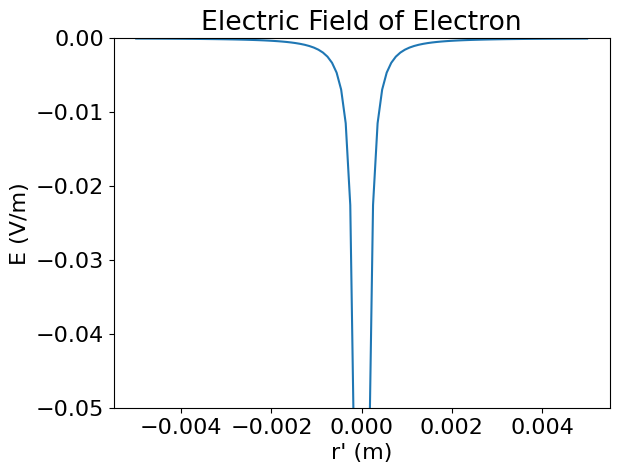

In [6]:
def E(r):
  return 1/(4*constants.pi*constants.epsilon_0)*-1*constants.e/(r**2)

r = np.linspace(-5e-3, 5e-3, 100)

E = E(r)

plt.plot(r,E)
plt.xlabel('r\' (m)')
plt.ylabel('E (V/m)')
plt.ylim(-5e-2, 0)
plt.title('Electric Field of Electron')
plt.show()

2. The Galilean velocity transformation suggests that objects can "catch up" with light, so that light in a vacuum appears to be going slower than the value of  from Equation (1). Make a plot of $c^{\prime}$, the <strong>incorrect</strong> speed of light in frame $K^{\prime}$ according to the Galilean transformation, as a function of $f$. Put units on the axes where appropriate.

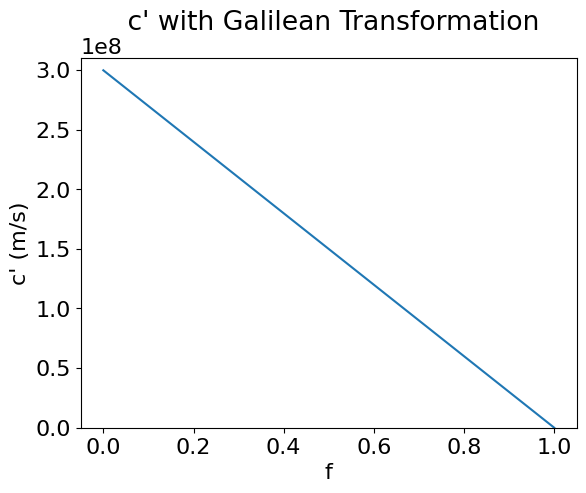

In [7]:
def c(f):
  return constants.c*(1-f)

f = np.linspace(0, 1, 100)

c = c(f)

plt.plot(f,c)
plt.xlabel('f')
plt.ylabel('c\' (m/s)')
plt.ylim(0, 3.1e8)
plt.title(' c\' with Galilean Transformation')
plt.show()

3. In frame $K^{\prime}$, something has to give: either Equation (1) is no longer true, or the values of $\epsilon_0$ and/or $\mu_0$ have to change. Suppose Equation (1) is still true and $\mu_0 = \mu_0^{\prime}$. Make a plot with two vertically stacked subplots. The top subplot should show $\epsilon_0^{\prime}$ as a function of $f$, while the bottom plot should show the electric field $E^{\prime} = \frac{1}{4 \pi \epsilon_0^{\prime}} \frac{q}{{r^{\prime}}^2}$ at $r^{\prime} = 1 \mu \mathrm{m} = 10^{-6}$ m as a function of $f$. Put units on the axes where appropriate.

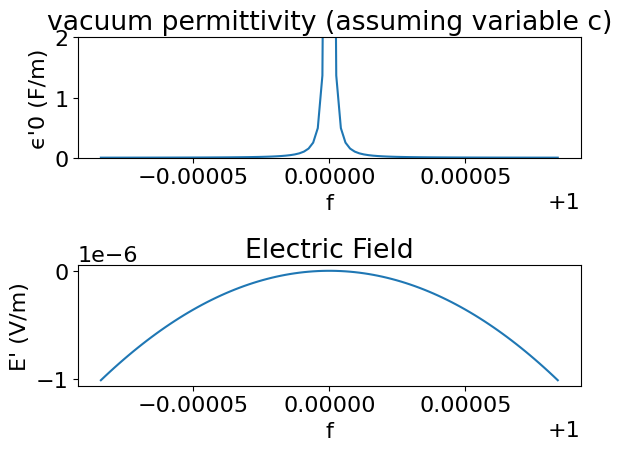

In [8]:
def e(f):
  return (constants.epsilon_0)/((1-f)**2)

f = np.linspace(0.999916, 1.000084, 100)

e = e(f)

def E(f):
  return (((1-f)**2) / (4*constants.pi*constants.epsilon_0))*(-1*constants.e/10e-12)

E = E(f)

plt.subplot(2, 1, 1)
plt.plot(f,e)
plt.ylim(0, 2)
plt.xlabel('f')
plt.ylabel('ϵ\'0 (F/m)')
plt.title("vacuum permittivity (assuming variable c)")

plt.subplot(2, 1, 2)
plt.plot(f,E)
plt.xlabel('f')
plt.ylabel('E\' (V/m)')
plt.title("Electric Field")

plt.tight_layout()
plt.show()

4. Now assume $f = 0.5$. In the same plot window, plot $E^{\prime}(r^{\prime})$ given by Equation 2 (same curve as in Problem 1) <em>and</em> $E^{\prime}(r^{\prime})$ calculated as in Problem 3, where $\epsilon_0^{\prime}$ is a function of $f$. Do you notice a problem?

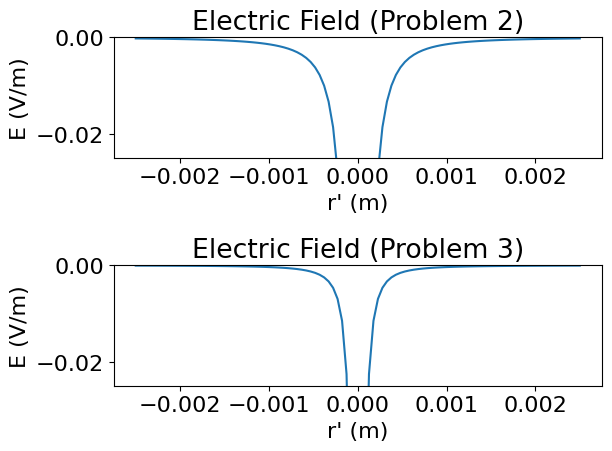

In [15]:
def E(r):
  return 1/(4*constants.pi*constants.epsilon_0)*-1*constants.e/(r**2)

def E2(r):
  return 1/(16*constants.pi*constants.epsilon_0)*-1*constants.e/(r**2)

r = np.linspace(-2.5e-3, 2.5e-3, 100)

E = E(r)
E2 = E2(r)

plt.subplot(2, 1, 1)
plt.plot(r,E)
plt.xlabel('r\' (m)')
plt.ylabel('E (V/m)')
plt.ylim(-2.5e-2, 0)
plt.title('Electric Field (Problem 2)')

plt.subplot(2, 1, 2)
plt.plot(r,E2)
plt.xlabel('r\' (m)')
plt.ylabel('E (V/m)')
plt.ylim(-2.5e-2, 0)
plt.title('Electric Field (Problem 3)')

plt.tight_layout()
plt.show()

5. To resolve the issues revealed by the plot from Problem 4, you may suggest setting $\epsilon_0^{\prime} = \epsilon_0$ and allowing $\mu_0^{\prime}$ to vary with $f$. Let's explore that solution. To accompany the point charge in problems 1-4, add a current loop that's also at rest in frame $K^{\prime}$. Recall that the magnitude of the magnetic field strength at the center of the loop in frame $K$ is $B = \frac{\mu_0 I}{2R}$, where $I$ is the current and $R$ is the radius of the loop. Suppose $I = 1$ A and $R = 1$ m. Assume $E^{\prime} = E$, $B^{\prime} = B$, and $c^{\prime}$ depends on $f$ as in problem 2. Plot $\mu_0$ as a function of $f$.

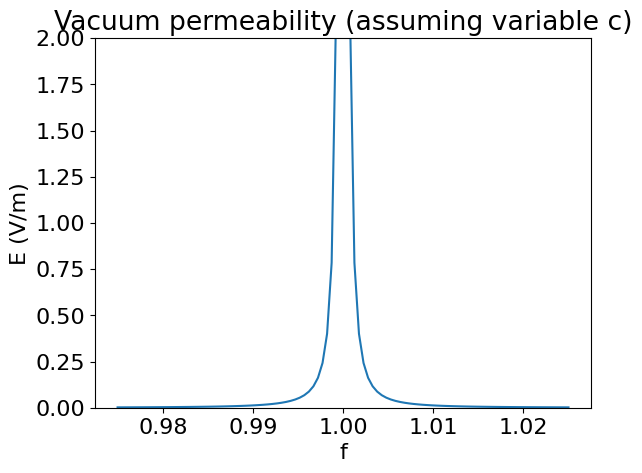

In [21]:
def m(f):
  return (constants.mu_0)/((1-f)**2)

f = np.linspace(0.97494, 1.02506, 100)

m = m(f)

plt.plot(f,m)
plt.xlabel('f')
plt.ylabel('E (V/m)')
plt.ylim(0, 2)
plt.title('Vacuum permeability (assuming variable c)')
plt.show()

6. If we calculate $c^{\prime}$ using the Galilean transformation in Equation 3, is there any value of $f$ for which $E^{\prime} = E$ <strong>and</strong> $B^{\prime} = B$? Make a graph to illustrate your answer.

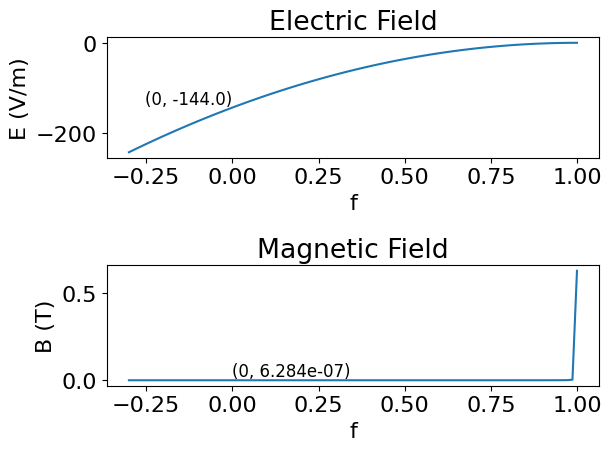

In [64]:
def E(f):
  return (((1-f)**2) / (4*constants.pi*constants.epsilon_0))*(-1*constants.e/10e-12)

def B(f):
  return constants.mu_0/(2*(1-f)**2)

f = np.linspace(-0.3, 0.999, 100)

E = E(f)
B = B(f)

plt.subplot(2, 1, 1)
plt.plot(f,E)
y_value_at_zero = np.interp(0, f, E)
plt.plot(0, y_value_at_zero)
plt.text(0, y_value_at_zero, f'({0}, {y_value_at_zero:.4})', fontsize=12, verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('f')
plt.ylabel('E (V/m)')
plt.title("Electric Field")

plt.subplot(2, 1, 2)
plt.plot(f, B)
plt.xlabel('f')
plt.ylabel('B (T)')
y_value_at_zero = np.interp(0, f, B)
plt.plot(0, y_value_at_zero)
plt.text(0, y_value_at_zero, f'({0}, {y_value_at_zero:.4})', fontsize=12, verticalalignment='bottom', horizontalalignment='left')
plt.title('Magnetic Field')

plt.tight_layout()
plt.show()

As seen in the graphs above, the only possible f that has the correct Magnetic and Electric Field results is 0. plugging in the equations to $B^{\prime} = B$ and $E^{\prime} = E$ gives you the equation $1 = (1-f)^2$ for both. Solving this equation for f results in the solutions $f = 0,2$. 2 is outside the bounds of f ($0<f<1$) so we can see the only possible result of 0 agrees with our graphs.

Conceptual questions about the conflict between the Galilean velocity transformation and E&M are in the written homework assignment.

$^{*}$Farad = Coulomb/Volt: Farad is the unit of capacitance, which measures the amount of charge necessary to increase the electric potential of a system by 1 Volt. Farads/meter measure how much capacitance you get per meter of free space between yourself and a charged particle.

$^{**}$Newtons/Ampere$^2$ = Newtons/(Coulombs/second)$^2$. $\mu_0$ measures how effective inductance is at creating magnetic force in free space.